# Modeling Cascading Behaviour
The Given task is to see that how an action/behaviour spreads over an existing behaviour
So basically the task is something like
* A network is given in which every node have some behaviour (let's say initial_behaviour) and we want to check whether an external behaviour let's say (new_behaviour) is possible or not to spread in our network by converting the nodes which are already having initial_behaviour
* i'm are doing this experiment by considering that few nodes of the graph are somehow changed their initial_behaviour to new_behaviour (but actually I'm coding for that, that we'll see below later).
* Along with changing the behaviours of few nodes I'm also providing some PAYOFFs for both the initial_behaviour and new_behaviour as a reason to spread the new_behaviour in the network

### Requirements/Instruction to execute this file
* Install Python (I've used Python3.7) using the command
```
sudo apt install python3.7
```
* Install Jupyter Nodebook using the command
```
pip install notebook
```
* Install Networkx package using the command
```
pip install networkx
```
**Run the cells of this notebook using Shift + Enter**

**----------------------------------------------------------------------------------------------------------------------**

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
# g = nx.Graph()

# g.add_edges_from([("1","2"), ("1","3"), ("2", "3"), ("2","6"), ("6","4"), ("6", "9"), ("4","5"), ("4","7"), ("5", "7"), ("5", "8"), ("8", "7"), ("8", "10"), ("8", "14"), ("9", "7"), ("9", "10"), ("9", "11"), ("7", "10"), ("10", "12"), ("11", "12"), ("11", "15"), ("12", "15"), ("12", "16"), ("13", "12"), ("13", "16"), ("13", "14"), ("13", "17"), ("14", "17"), ("17", "16"), ("15","16")])
# nx.draw(g,node_size=1200, with_labels=True)
# plt.show()


In [3]:
#g = nx.erdos_renyi_graph(10, 0.5)
#nx.write_gml(g, '/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph.gml')

In [ ]:
#g = nx.parse_edgelist('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/mygraph.csv')

Enter Number of Test cases: 1
Choosen network is: 


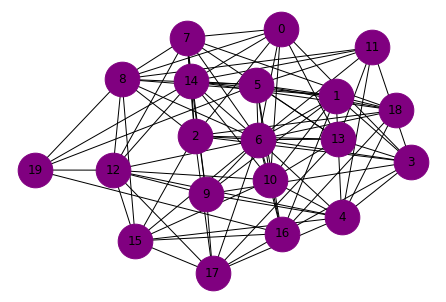

Enter PAYOFF for Initial bahaviour: 2
Enter PAYOFF for New bahaviour: 3
Enter number of inital seeds that you want to give: 1
Enter seed value: 2
Initial seed input given by the user is:  [2]
For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of:  0 )


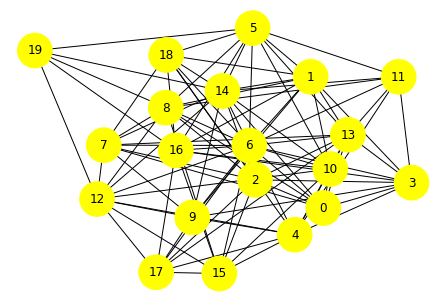

In [32]:


# g = nx.Graph()
# g.add_edges_from([("1","2"), ("1","3"), ("2", "3"), ("2","6"), ("6","4"), ("6", "9"), ("4","5"), ("4","7"), ("5", "7"), ("5", "8"), ("8", "7"), ("8", "10"), ("8", "14"), ("9", "7"), ("9", "10"), ("9", "11"), ("7", "10"), ("10", "12"), ("11", "12"), ("11", "15"), ("12", "15"), ("12", "16"), ("13", "12"), ("13", "16"), ("13", "14"), ("13", "17"), ("14", "17"), ("17", "16"), ("15","16")])
#nx.write_gml(g, '/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph.gml')
# nx.draw(g,node_size=1200, with_labels=True)
# plt.show()


g = nx.erdos_renyi_graph(20, 0.5)

print('Choosen network is: ')
nx.draw(g,node_color= 'purple' , node_size=1200,with_labels=True)
plt.show()
#g = nx.read_gml('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph.gml')
t = int(input('Enter Number of Test cases: '))
while(t):
    
    b = int(input('Enter PAYOFF for Initial bahaviour: '))
    a = int(input('Enter PAYOFF for New bahaviour: '))

    def cal_adopted_initial_beahaviour(each, type_of_behaviour, g):
        num=0
        for each1 in g.neighbors(each):
            if g.nodes[each1]['behaviour']=='initial_behaviour':
                num=num+1
        return num
    
    def cal_adopted_new_beahaviour(each, type_of_behaviour, g):
        num=0
        for each1 in g.neighbors(each):
            if g.nodes[each1]['behaviour']==type_of_behaviour:
                num=num+1
        return num

    def calculate_adoptation(g):
        dict1= {}
        #Payoff(A) =a=4
        #Payoff(B) =b=3
        #a=5
        #b=2
       # a = int(input('Enter payoff for new bahaviour: '))
        #b = int(input('Enter payoff for initial bahaviour: '))
        for each in g.nodes():
            num_new_beahaviour = cal_adopted_new_beahaviour(each, 'new_behaviour', g)
            num_initial_beahaviour = cal_adopted_initial_beahaviour(each, 'initial_behaviour', g)
            payoff_A=a*num_new_beahaviour
            payoff_B=b*num_initial_beahaviour
            if payoff_A >= payoff_B:
                dict1[each]='new_behaviour'
            else:
                dict1[each]= 'initial_behaviour'
        return dict1
        
    def check_new_behaviour(type_of_behaviour, g):
        count_new_behav=1
        for each in g.nodes():
            if g.nodes[each]['behaviour']!=type_of_behaviour:
                count_new_behav=0
                break
        return count_new_behav

    def check_initial_behaviour(type_of_behaviour, g):
        count_initial_behav=1
        for each in g.nodes():
            if g.nodes[each]['behaviour']!=type_of_behaviour:
                count_initial_behav=0
                break
        return count_initial_behav    

    def get_final_result(g, count):
        count_new=check_new_behaviour('new_behaviour', g)
        count_initial=check_initial_behaviour('initial_behaviour',g)
        if count_new==1 or count_initial==1 or count>=100:
            return 1
        else:
            return 0

    def col_fun(g):
        infected_seed=[]
        for each in g.nodes():
            if g.nodes[each]['behaviour']=='initial_behaviour':
                infected_seed.append('yellow')
            else:
                infected_seed.append('green')
        return infected_seed
    

    external_behaviour = "new_behaviour"
    bahaviour_1 = "initial_behaviour"
    for each in g.nodes():
        g.nodes[each]['behaviour'] = bahaviour_1
    
    #n1 = input()
    #n2 = input()
    #infected_seed = [2,5,8]
    infected_seed = []
    n= int(input("Enter number of inital seeds that you want to give: "))

    for i in range(0,n):
        seed_val = int(input('Enter seed value: '))
        infected_seed.append(seed_val)
    
    print('Initial seed input given by the user is: ', infected_seed)
    
    
    

    for each in infected_seed:
        g.nodes[each]['behaviour'] = external_behaviour 

    #a = input("payoff for A: ")
    #b= input("payoff for B: ")
    temp =0
    count =0
    while(1):
        temp = get_final_result(g, count)
        if temp==1:
            break
        count = count+1
        behaviour_di  = calculate_adoptation(g)
        for each in behaviour_di:
            g.nodes[each]['behaviour']= behaviour_di[each]
        colors = col_fun(g)

    val =check_new_behaviour('new_behaviour', g)
    if val==1:
        print('For the provided initial seed input for new bahaviour the cascade is COMPLETE ( with cascading size of: ', len(g),')')
    else:
        count = 0
        for i in g.nodes():
            if(g.nodes[i]['behaviour'] == "new_behaviour"):
                count = count +1
        print('For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of: ', count,')')
    nx.draw(g,node_color= colors , node_size=1200,with_labels=True)
    plt.show()
    t=t-1



In [ ]:
## g = nx.read_gml('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph.gml')

In [5]:
#nx.draw(g, with_labels=True)

In [6]:
#set_all_B(g)

In [7]:
#list1=[2,5]

In [8]:
#colors= get_colors(g)

In [9]:
#nx.draw(g, node_color = colors, node_size=800, with_labels=True)
#plt.show()

In [10]:
#g = nx.parse_edgelist('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/mygraph.csv')

In [11]:
#g = nx.erdos_renyi_graph(20, 0.5)

In [7]:
#len(g)

20

In [54]:
#g.nodes[1]

{'action': 'A'}

In [60]:
#nx.draw(g,node_color= colors , node_size=800,with_labels=True)
#plt.show()

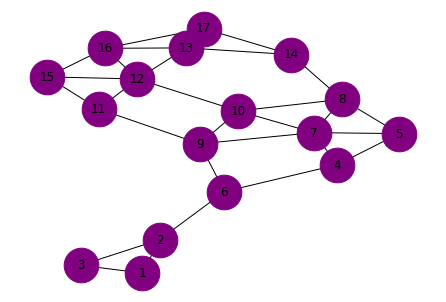

Enter Number of Test cases: 1
Enter PAYOFF for Initial bahaviour: 2
Enter PAYOFF for New bahaviour: 3
1 2 :
For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of:  3 )
1 3 :
For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of:  3 )
1 6 :
For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of:  4 )
1 4 :
For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of:  5 )
1 9 :
For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of:  5 )
1 5 :
For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of:  4 )
1 7 :
For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of:  4 )
1 8 :
For the provided initial seed input for new bahaviour the cascade is INCO

For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of:  3 )
11 4 :
For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of:  2 )
11 9 :
For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of:  2 )
11 5 :
For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of:  2 )
11 7 :
For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of:  14 )
11 8 :
For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of:  2 )
11 14 :
For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of:  2 )
11 12 :
For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of:  7 )
11 15 :
For the provided initial seed input for new bahaviou

In [34]:

#g = nx.erdos_renyi_graph(20, 0.5)

#g = nx.read_gml('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph.gml')
g = nx.Graph()

g.add_edges_from([("1","2"), ("1","3"), ("2", "3"), ("2","6"), ("6","4"), ("6", "9"), ("4","5"), ("4","7"), ("5", "7"), ("5", "8"), ("8", "7"), ("8", "10"), ("8", "14"), ("9", "7"), ("9", "10"), ("9", "11"), ("7", "10"), ("10", "12"), ("11", "12"), ("11", "15"), ("12", "15"), ("12", "16"), ("13", "12"), ("13", "16"), ("13", "14"), ("13", "17"), ("14", "17"), ("17", "16"), ("15","16")])
nx.draw(g,node_size=1200,node_color= 'purple', with_labels=True)
plt.show()

t = int(input('Enter Number of Test cases: '))

while(t):
    
    b = int(input('Enter PAYOFF for Initial bahaviour: '))
    a = int(input('Enter PAYOFF for New bahaviour: '))

    def cal_adopted_initial_beahaviour(each, type_of_behaviour, g):
        num=0
        for each1 in g.neighbors(each):
            if g.nodes[each1]['behaviour']=='initial_behaviour':
                num=num+1
        return num
    
    def cal_adopted_new_beahaviour(each, type_of_behaviour, g):
        num=0
        for each1 in g.neighbors(each):
            if g.nodes[each1]['behaviour']==type_of_behaviour:
                num=num+1
        return num

    def calculate_adoptation(g):
        dict1= {}
        #Payoff(A) =a=4
        #Payoff(B) =b=3
        #a=5
        #b=2

       # a = int(input('Enter payoff for new bahaviour: '))
        #b = int(input('Enter payoff for initial bahaviour: '))
        
        for each in g.nodes():
           # for each1 in g.neighbors(each):
            if g.nodes[each]['behaviour']=='initial_behaviour':            
                num_new_behaviour = cal_adopted_new_beahaviour(each, 'new_behaviour', g)
                num_initial_beahaviour = cal_adopted_initial_beahaviour(each, 'initial_behaviour', g)       
                payoff_A=a*num_new_behaviour
                payoff_B=b*num_initial_beahaviour
                if payoff_A >= payoff_B:
                    dict1[each]='new_behaviour'
                else:
                    dict1[each]= 'initial_behaviour'
            else:
                dict1[each]='new_behaviour'
        return dict1
        
    def check_new_behaviour(type_of_behaviour, g):
        count_new_behav=1
        for each in g.nodes():
            if g.nodes[each]['behaviour']!=type_of_behaviour:
                count_new_behav=0
                break
        return count_new_behav

    def check_initial_behaviour(type_of_behaviour, g):
        count_initial_behav=1
        for each in g.nodes():
            if g.nodes[each]['behaviour']!=type_of_behaviour:
                count_initial_behav=0
                break
        return count_initial_behav    

    def get_final_result(g, count):
        count_new=check_new_behaviour('new_behaviour', g)
        count_initial=check_initial_behaviour('initial_behaviour',g)
        if count_new==1 or count_initial==1 or count>=100:
            return 1
        else:
            return 0

        
    for seed_node1 in g.nodes():
        for seed_node2 in g.nodes():
            if seed_node1<seed_node2:
                print(seed_node1,seed_node2, ':')
                infected_seed = []
                infected_seed.append(seed_node1)
                infected_seed.append(seed_node2)
            
            
                external_behaviour = "new_behaviour"
                bahaviour_1 = "initial_behaviour"
                for each in g.nodes():
                    g.nodes[each]['behaviour'] = bahaviour_1
    

                for each in infected_seed:
                    g.nodes[each]['behaviour'] = external_behaviour 
                
                temp =0
                count =0
                while(1):
                    temp = get_final_result(g, count)
                    if temp==1:
                        break
                    count = count+1
                    behaviour_di  = calculate_adoptation(g)
                    for each in behaviour_di:
                        g.nodes[each]['behaviour']= behaviour_di[each]

                val =check_new_behaviour('new_behaviour', g)
                if val==1:
                    print('cascade complete with size: ', len(g))
                else:
                    count =0
                    for i in g.nodes():
                        if(g.nodes[i]['behaviour'] == "new_behaviour"):
                            count = count +1
                    print('For the provided initial seed input for new bahaviour the cascade is INCOMPLETE ( with cascading size of: ', count,')')
    print('\n\n')
    t = t-1